In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random



import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt



In [2]:
#better data format than what was used in q1-a
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

#normalize datas
train_x, test_x = train_x / 255.0, test_x / 255.0



In [3]:
from tensorflow import keras
from tensorflow.keras import layers

input_img = keras.Input(shape=(32, 32, 3))


x = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)

encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:

autoencoder.fit(train_x, train_x,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(test_x, test_x))

Epoch 1/5
391/391 [==============================] - 59s 150ms/step - loss: 0.6047 - val_loss: 0.5888
Epoch 2/5
391/391 [==============================] - 57s 146ms/step - loss: 0.5847 - val_loss: 0.5832
Epoch 3/5
391/391 [==============================] - 55s 141ms/step - loss: 0.5811 - val_loss: 0.5815
Epoch 4/5
391/391 [==============================] - 58s 148ms/step - loss: 0.5792 - val_loss: 0.5791
Epoch 5/5
391/391 [==============================] - 57s 145ms/step - loss: 0.5777 - val_loss: 0.5777


In [5]:
enc = keras.Model(input_img,encoded)

In [26]:
mod_input = enc.predict(train_x)
classifier_mod = tf.keras.Sequential( [ layers.Conv2D(64, (3,3), kernel_regularizer= tf.keras.regularizers.l1(0.001)), 
                                       layers.MaxPool2D((2,2)),
                                      layers.Flatten(),
                                      layers.Dense(10)])
classifier_mod.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [27]:
history = classifier_mod.fit(mod_input, train_y, epochs=50, validation_data=(enc.predict(test_x),test_y )  )

Epoch 1/50
1563/1563 [==============================] - 2s 985us/step - loss: 2.1124 - accuracy: 0.3072 - val_loss: 1.9464 - val_accuracy: 0.3540
Epoch 2/50
1563/1563 [==============================] - 1s 935us/step - loss: 1.9081 - accuracy: 0.3652 - val_loss: 1.9028 - val_accuracy: 0.3531
Epoch 3/50
1563/1563 [==============================] - 1s 936us/step - loss: 1.8444 - accuracy: 0.3883 - val_loss: 1.8236 - val_accuracy: 0.3887
Epoch 4/50
1563/1563 [==============================] - 1s 941us/step - loss: 1.8034 - accuracy: 0.4014 - val_loss: 1.7639 - val_accuracy: 0.4172
Epoch 5/50
1563/1563 [==============================] - 1s 944us/step - loss: 1.7736 - accuracy: 0.4143 - val_loss: 1.7482 - val_accuracy: 0.4296
Epoch 6/50
1563/1563 [==============================] - 1s 944us/step - loss: 1.7569 - accuracy: 0.4164 - val_loss: 1.7482 - val_accuracy: 0.4114
Epoch 7/50
1563/1563 [==============================] - 1s 951us/step - loss: 1.7411 - accuracy: 0.4244 - val_loss: 1.7625 -

Text(0.5, 0, 'epoch')

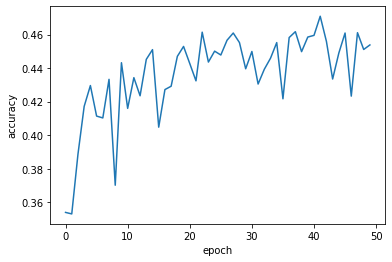

In [28]:
plt.plot(list(history.history["val_accuracy"]))
plt.ylabel("accuracy")
plt.xlabel("epoch")
# plt.savefig("q1-e_loss.jpg")

In [29]:
predictions = classifier_mod.predict(enc.predict(test_x))
predicted_classes = np.argmax(predictions, axis=1)

In [30]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_y, np.rint(predicted_classes))
confusion_matrix

array([[471,  46,  38,   4,  76,   4,  46,  29, 205,  81],
       [ 34, 578,   6,   1,  22,   2,  34,  23,  65, 235],
       [ 78,  39, 199,  10, 285,  36, 220,  79,  32,  22],
       [ 30,  49,  88,  70, 148, 105, 315, 102,  16,  77],
       [ 35,  19,  58,   4, 510,   9, 243,  73,  22,  27],
       [ 19,  19,  97,  46, 146, 232, 218, 171,  23,  29],
       [  3,  22,  28,   5, 110,   4, 773,  25,  13,  17],
       [ 28,  31,  28,  12, 166,  27,  85, 519,  16,  88],
       [121,  75,  12,   4,  50,   7,  31,  12, 580, 108],
       [ 35, 188,   5,   4,  16,   4,  52,  33,  57, 606]])